In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

import pandas as pd # type: ignore
# 显示所有列
pd.set_option('display.max_columns', None)
# # 显示所有行
pd.set_option('display.max_rows', None) 

# 假设df是已经加载的包含信用得分的DataFrame，并且'credit_score'列包含信用得分
df = pd.read_csv("../Data/Q2_german_credit_data_with_scores.csv")  # 将"your_data.csv"替换为你的数据文件名

# 假设'credit_score'是包含信用得分的列名
X = df[['Credit_Score']]  # 选择信用得分列作为特征
K

# 使用K-means进行聚类（5个信用等级）
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# 预测所有数据的信用等级
labels = kmeans.predict(X)
# 将信用等级添加回DataFrame
df['Credit_Rating'] = labels

# 计算每个聚类的平均违约率
cluster_default_rates = df.groupby('Credit_Rating')['Y(1=default, 0=non-default)'].mean().sort_values(ascending=False)

# 根据违约率重新分配信用等级（5最高，1最低）
credit_score_mapping = {old_score: new_score for new_score, old_score in enumerate(cluster_default_rates.index, 0)}
df['Credit_Rating'] = df['Credit_Rating'].map(credit_score_mapping)



df.to_csv('../Data/Q4_german_credit_data_with_ratings.csv', index=False)
# 打印结果
print(df[['Credit_Score', 'Credit_Rating']])

# 注意：非线性规划的部分在这个例子中不会实现，
# 因为非线性规划通常不直接用于聚类结果的优化。
# 但你可以根据聚类结果（即'credit_rating'）手动调整或进一步分析。

NameError: name 'K' is not defined

### 聚类结果可视化（尝试换一种更直观的可视化方式）

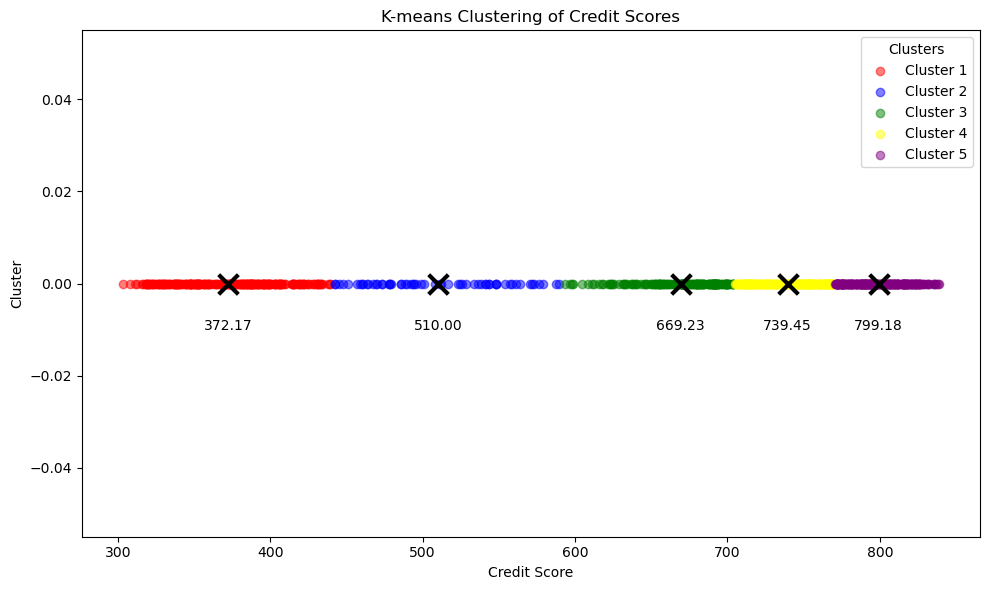

In [ ]:
import matplotlib.pyplot as plt


# 绘制聚类结果
plt.figure(figsize=(10, 6))

# 计算聚类中心
centers = kmeans.cluster_centers_.flatten()

# 绘制每个数据点的散点图，并根据其聚类标签进行着色

# 需要蔺经纬同志调配色！
colors = ['red', 'blue', 'green', 'yellow', 'purple']  # 假设有5个聚类
# 需要蔺经纬同志调配色！

for i, color in enumerate(colors):
    plt.scatter(X[df['Credit_Rating'] == i]['Credit_Score'], [0] * len(X[df['Credit_Rating'] == i]['Credit_Score']), 
                label=f'Cluster {i+1}', color=color, alpha=0.5)

# 绘制聚类中心并标明横坐标
plt.scatter(centers, [0] * len(centers), c='black', marker='x', s=200, linewidths=3, zorder=3)
for i, center in enumerate(centers):
    plt.text(center, -0.01, f'{center:.2f}', ha='center')


# 设置图例
plt.legend(title='Clusters')

# 设置x轴标签和标题
plt.xlabel('Credit Score')
plt.ylabel('Cluster')
plt.title('K-means Clustering of Credit Scores')

plt.savefig('../Data/Q4_kmeans_credit_scores.png')
# 显示图形
plt.tight_layout()
plt.show()

d:\ProgramData\anaconda3\envs\pyTorchgpuEnv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ProgramData\anaconda3\envs\pyTorchgpuEnv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ProgramData\anaconda3\envs\pyTorchgpuEnv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


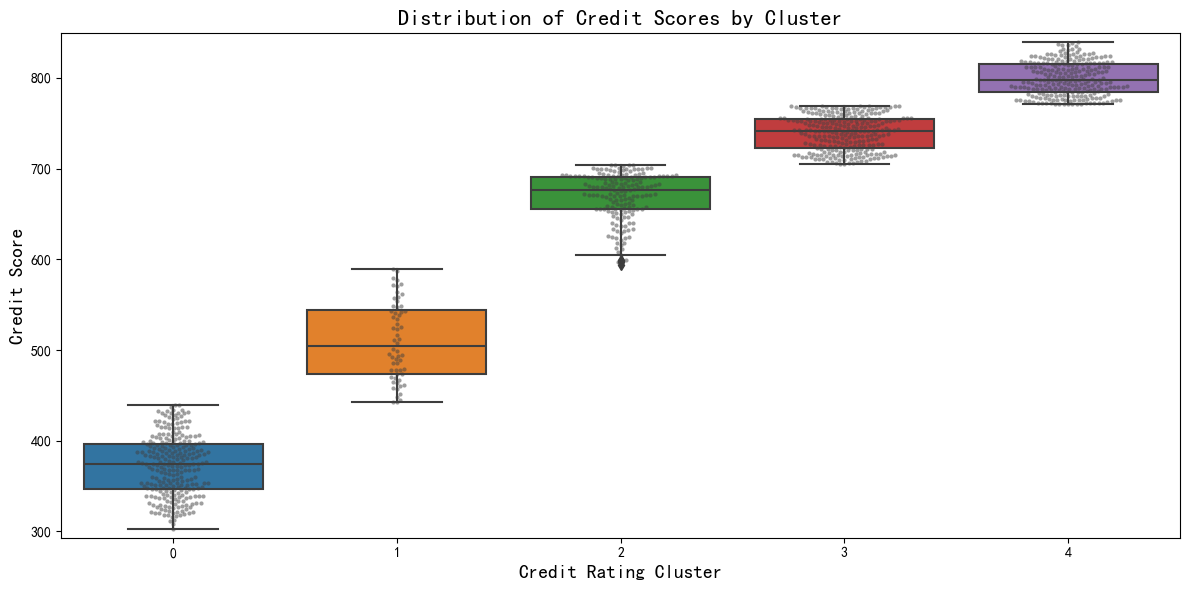

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
# 创建一个新的图形
plt.figure(figsize=(12, 6))

# 使用seaborn绘制箱线图
sns.boxplot(x='Credit_Rating', y='Credit_Score', data=df)

# 添加标题和标签
plt.title('Distribution of Credit Scores by Cluster', fontsize=16)
plt.xlabel('Credit Rating Cluster', fontsize=14)
plt.ylabel('Credit Score', fontsize=14)

# 调整y轴的范围，使其更贴近数据
y_min = df['Credit_Score'].min() - 10
y_max = df['Credit_Score'].max() + 10
plt.ylim(y_min, y_max)

# 为每个箱子添加数据点的散点图

# 需要蔺经纬同志调配色！
sns.swarmplot(x='Credit_Rating', y='Credit_Score', data=df, color=".25", size=3, alpha=0.5)
# 需要蔺经纬同志调配色！

# 保存图形
plt.savefig('../Data/Q4_kmeans_credit_scores_boxplot.png', dpi=300, bbox_inches='tight')

# 显示图形
plt.tight_layout()
plt.show()


各信用等级的平均违约率：
Credit_Rating
0    0.973077
1    0.516667
2    0.052023
3    0.015209
4    0.012295
Name: Y(1=default, 0=non-default), dtype: float64


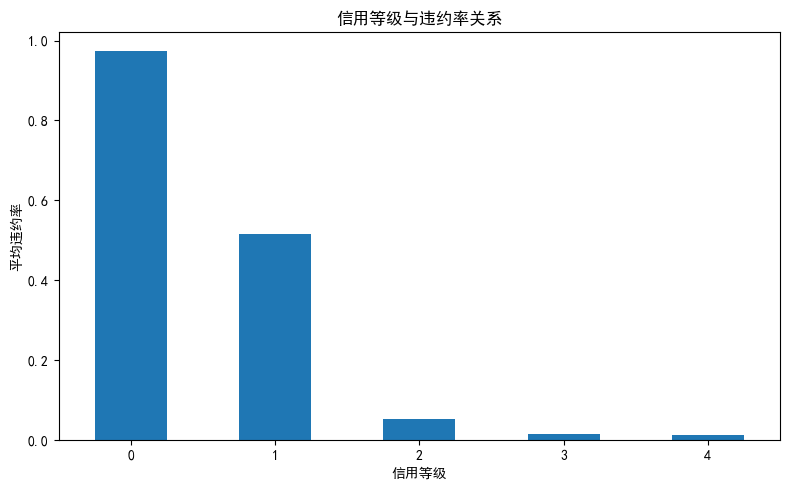

In [ ]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
print("\n各信用等级的平均违约率：")
print(cluster_default_rates)

# 可视化信用等级与违约率的关系
plt.figure(figsize=(8, 5))

# 需要蔺经纬同志调配色！
df.groupby('Credit_Rating')['Y(1=default, 0=non-default)'].mean().sort_index().plot(kind='bar')
# 需要蔺经纬同志调配色！

plt.title('信用等级与违约率关系')
plt.xlabel('信用等级')
plt.ylabel('平均违约率')
plt.xticks(rotation=0)
plt.savefig('../Data/Q4_credit_rating_default_rates.png', dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()